In [47]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
file_path = 'C:/Users/Katerina/Team2 Project/Team-2-Project/data/df_cleaned.csv'
df = pd.read_csv(file_path)

In [49]:
df

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name,outlier,car brand,model,anomaly_score,multivariate_outlier,car_name_encoded
0,18.0,8.0,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,Normal,chevrolet,chevelle malibu,1,Normal,5
1,15.0,8.0,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,Normal,buick,skylark 320,1,Normal,3
2,18.0,8.0,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,Normal,plymouth,satellite,1,Normal,19
3,16.0,8.0,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,Normal,amc,rebel sst,1,Normal,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70,1,ford torino,Normal,ford,torino,1,Normal,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,27.0,4.0,151.0,90.0,2950.0,17.3,82,1,chevrolet camaro,Normal,chevrolet,camaro,1,Normal,5
374,27.0,4.0,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,Normal,ford,mustang gl,1,Normal,10
375,32.0,4.0,135.0,84.0,2295.0,11.6,82,1,dodge rampage,Normal,dodge,rampage,1,Normal,8
376,28.0,4.0,120.0,79.0,2625.0,18.6,82,1,ford ranger,Normal,ford,ranger,1,Normal,10


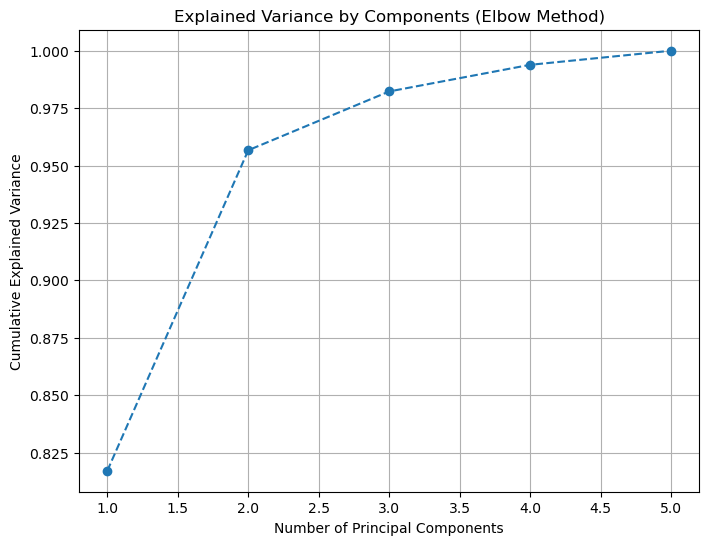

Component 1: 81.71% cumulative explained variance
Component 2: 95.67% cumulative explained variance
Component 3: 98.23% cumulative explained variance
Component 4: 99.39% cumulative explained variance
Component 5: 100.00% cumulative explained variance


In [50]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Selecting numerical features excluding categorical/text columns
numerical_features = ['cylinders', 'displayments', 'horsepower', 'weight','acceleration']


# Extract the numerical columns from the dataframe
X = df[numerical_features]

# Step 4: Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(X_scaled)

# Calculate explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Elbow Method: Plot cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Components (Elbow Method)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Display explained variance ratios for the components
for i, var in enumerate(cumulative_variance, 1):
    print(f"Component {i}: {var:.2%} cumulative explained variance")


In [51]:
import plotly.express as px
import pandas as pd

# Create a DataFrame for the first three principal components
projected_3d_df = pd.DataFrame(pca_result[:, :3], columns=['PC1', 'PC2', 'PC3'])

# Create an interactive 3D scatter plot
fig = px.scatter_3d(
    projected_3d_df,
    x='PC1',
    y='PC2',
    z='PC3',
    title='Interactive 3D Projection of the First Three Principal Components',
    opacity=0.7
)
# Customize the layout for a larger figure
fig.update_layout(
    width=1200,  # Increase width
    height=900,  # Increase height
    title_font=dict(size=20),
)

# Reduce marker size for smaller data points
fig.update_traces(marker=dict(size=3))  # Adjust the size of the data points

# Show the interactive plot
fig.show()


C:\Users\Katerina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



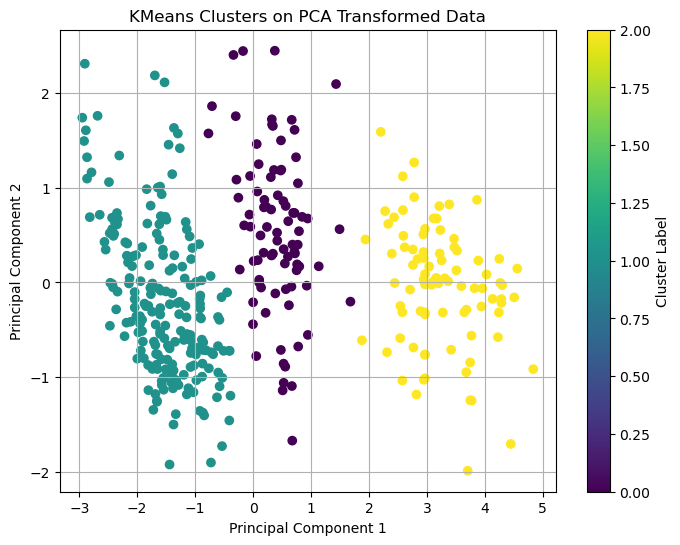

Cluster Centers (in PCA space):
Cluster 1: [ 0.40402646  0.53582964  0.1858504  -0.07133396 -0.03323612]
Cluster 2: [-1.54616872e+00 -2.04962152e-01 -9.31655197e-02  6.78562734e-04
  1.43447447e-02]
Cluster 3: [ 3.24388864e+00 -4.67138796e-02  3.58137563e-02  6.89151218e-02
 -9.46740458e-04]

Cluster Sizes:
Cluster 0: 86 samples
Cluster 1: 205 samples
Cluster 2: 87 samples


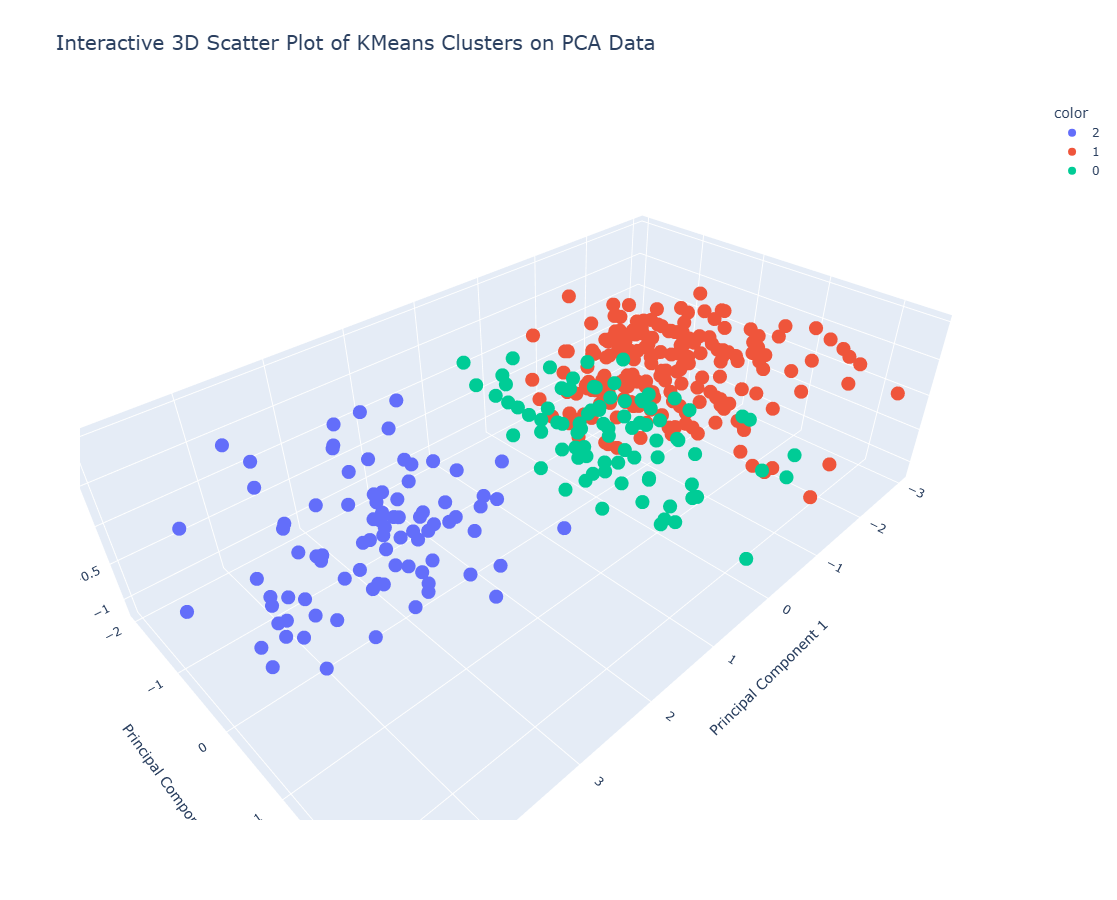

In [52]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px



# KMeans clustering after PCA
kmeans = KMeans(n_clusters=3, random_state=42)  # You can change the number of clusters
kmeans_result = kmeans.fit(pca_result)  # Fit KMeans on PCA results



# Plot the clusters in the first two principal components (for visualization)
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.title('KMeans Clusters on PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()

# Display the cluster centers in the principal component space
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers (in PCA space):")
for i, center in enumerate(cluster_centers, 1):
    print(f"Cluster {i}: {center}")

# Display the number of samples in each cluster
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print("\nCluster Sizes:")
for label, count in zip(unique, counts):
    print(f"Cluster {label}: {count} samples")

# Interactive 3D scatter plot for the first three principal components
fig = px.scatter_3d(
    x=pca_result[:, 0], 
    y=pca_result[:, 1], 
    z=pca_result[:, 2], 
    color=kmeans.labels_.astype(str),  # Cluster labels for color
    labels={'x': 'Principal Component 1', 'y': 'Principal Component 2', 'z': 'Principal Component 3'},
    title='Interactive 3D Scatter Plot of KMeans Clusters on PCA Data'
)
# Customize the layout for a larger figure
fig.update_layout(
    width=1200,  # Increase width
    height=900,  # Increase height
    title_font=dict(size=20),
)

fig.show()


In [53]:
df['assigned_cluster'] = kmeans.labels_


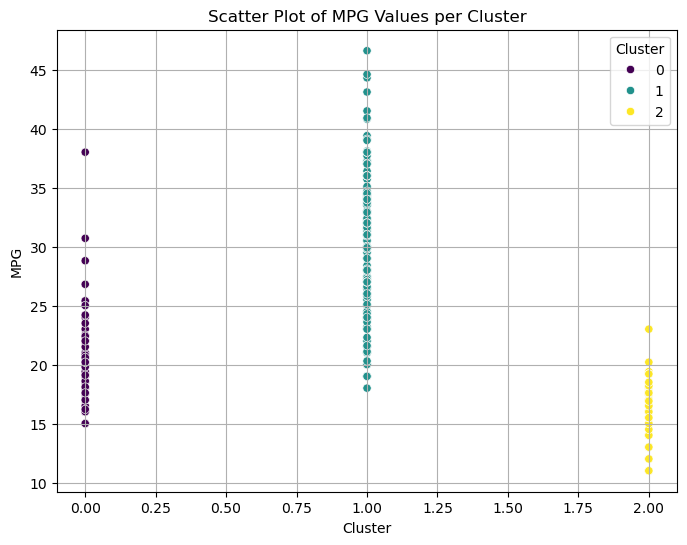

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of mpg values for each cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='assigned_cluster', y='mpg', hue='assigned_cluster', palette='viridis')
plt.title('Scatter Plot of MPG Values per Cluster')
plt.xlabel('Cluster')
plt.ylabel('MPG')
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.show()


In [55]:
# Step 4: Assign the cluster labels to the DataFrame
# Step 2: Analyze the MPG values within each cluster and their frequency
cluster_summary = df.groupby('assigned_cluster')['mpg'].describe()
cluster_summary

,count,mean,std,min,25%,50%,75%,max
assigned_cluster,,,,,,,,
0,86.0,19.891860,3.554193,15.0,18.0,19.05,21.0,38.0
1,205.0,29.059024,5.638695,18.0,25.0,28.00,32.9,46.6
2,87.0,14.971264,2.241569,11.0,13.0,15.00,16.0,23.0


In [56]:
import pandas as pd

# Assuming 'df' is your dataframe and it has the 'mpg' and 'pca_kmeans_clusters' columns

# Step 1: Define a function to assign labels based on the new ranges
def assign_mpg_label(mpg):
    if 11.0 <= mpg <= 18.0:  # Low range
        return 'Low'
    elif 18.0 < mpg <= 24:  # Medium range
        return 'Medium'
    else :                   # High range
        return 'High'
  

# Step 2: Apply the label function to assign 'Low', 'Medium', or 'High'
df['mpg_label'] = df['mpg'].apply(assign_mpg_label)

instances_per_cluster = df.groupby('mpg_label').size()

print(instances_per_cluster)

# Step 3: Verify the assignment
df

mpg_label
High      168
Low       111
Medium     99
dtype: int64


,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name,outlier,car brand,model,anomaly_score,multivariate_outlier,car_name_encoded,assigned_cluster,mpg_label
0,18.0,8.0,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,Normal,chevrolet,chevelle malibu,1,Normal,5,2,Low
1,15.0,8.0,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,Normal,buick,skylark 320,1,Normal,3,2,Low
2,18.0,8.0,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,Normal,plymouth,satellite,1,Normal,19,2,Low
3,16.0,8.0,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,Normal,amc,rebel sst,1,Normal,0,2,Low
4,17.0,8.0,302.0,140.0,3449.0,10.5,70,1,ford torino,Normal,ford,torino,1,Normal,10,2,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,27.0,4.0,151.0,90.0,2950.0,17.3,82,1,chevrolet camaro,Normal,chevrolet,camaro,1,Normal,5,1,High
374,27.0,4.0,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,Normal,ford,mustang gl,1,Normal,10,1,High
375,32.0,4.0,135.0,84.0,2295.0,11.6,82,1,dodge rampage,Normal,dodge,rampage,1,Normal,8,1,High
376,28.0,4.0,120.0,79.0,2625.0,18.6,82,1,ford ranger,Normal,ford,ranger,1,Normal,10,1,High


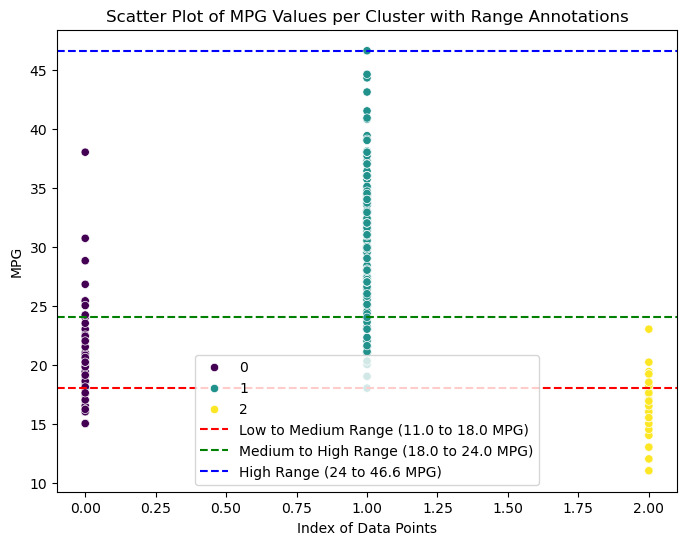

In [57]:
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe and it contains 'mpg' and 'pca_kmeans_clusters' columns

# Scatter plot of mpg values for each cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='assigned_cluster', y='mpg', hue='assigned_cluster', palette='viridis')


# Step 2: Add the range values for Low, Medium, and High categories
plt.axhline(y=18, color='r', linestyle='--', label='Low to Medium Range (11.0 to 18.0 MPG)')
plt.axhline(y=24, color='g', linestyle='--', label='Medium to High Range (18.0 to 24.0 MPG)')
plt.axhline(y=46.6, color='b', linestyle='--', label='High Range (24 to 46.6 MPG)')

# Step 3: Labeling and Titles
plt.title('Scatter Plot of MPG Values per Cluster with Range Annotations')
plt.xlabel('Index of Data Points')
plt.ylabel('MPG')
plt.legend()

# Step 4: Show the plot
plt.show()



df.drop(columns=['assigned_cluster'], inplace=True)